In [67]:
using Pkg
Pkg.activate("../..")
using Plots, ForwardDiff, SymbolicNumericIntegration, SymPy
using LinearAlgebra
include("../../julia_chaos/src/tools.jl")
using .ChaosTools

  Activating project at `~/Documents/STUDY/Bsc/ComplexSystems/blog/JuliaChaos`


## Intro

In the previous entries, we saw that the classification of systems, as well as the analysis of their stability, is very straight when the phase space is one-dimensional. However, when the phase space is two-dimensional, the situation is much richer. In this entry, we will see how to classify two-dimensional systems and study their behavior... But first starting with linear systems, which are defined by the set of differential equations:

$$\dot x = ax + by$$
$$\dot y = cx + dy$$

where $a, b, c, d$ are constants. The phase space of such a system is the plane spanned by the two variables $x$ and $y$. The phase portrait of such a system is a vector field, which is the set of all the vectors $\vec{v} = (v_x, v_y)$, where $v_x$ and $v_y$ are the components of the vector $\vec{v}$ in the $x$ and $y$ directions, respectively. To further simplify this system, we can define the following matrix:

$$\mathbf{A} = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$$

The linearity of the system is inherited from the linearity of the matrix $\mathbf{A}$, as any combination of solutions must also be a solution for it. It doesn't take much to see that the phase portrait of a linear system contains always a solution in the origin, which always is in the kernel. To summarize, the phase portrait of a linear system is the set of all the vectors $\vec{v}$ such that:

$$\mathbf{\vec x(t)} = \sum_i \vec v_i e^{\lambda_i t}\mathbf{\vec x(0)}$$

where $\mathbf{x(t)}$ is the vector of the state of the system at time $t$, and $\mathbf{x(0)}$ is the initial condition of the system. The vectors $\vec v_i$ are the eigenvectors of the matrix $\mathbf{A}$, and $\lambda_i$ are the eigenvalues of the matrix $\mathbf{A}$. The eigenvalues are the roots of the characteristic polynomial of the matrix $\mathbf{A}$.

---

Example 1:

Let us study the behavior of a system very common to everybody: an harmonic oscillator (a mass attached to a spring). In this case, the system is given by:

$$\"{x} = -kx$$

Which we can rewrite as a set of two first-order differential equations by using $x_2 = \dot{x}$ and $x_1 = x$:

$$\dot x_1 = x_2$$
$$\dot x_2 = - \omega^2 x_1$$

Ofcourse, we can also write this system in matrix form: 

$$\mathbf{A} = \begin{bmatrix} 0 & 1 \\ -\omega^2 & 0 \end{bmatrix}$$

This reminds us of the characteristic matrix describing a rotation in the plane. In fact, the phase portrait of the harmonic oscillator is a circle, which is the phase portrait of a rotation in the plane:

┌ Info: Saved animation to /home/jose/Documents/STUDY/Bsc/ComplexSystems/blog/JuliaChaos/entries/two_dim_flows/linear_systems.gif
└ @ Plots /home/jose/.julia/packages/Plots/M4dfL/src/animation.jl:156


Plots.AnimatedGif("/home/jose/Documents/STUDY/Bsc/ComplexSystems/blog/JuliaChaos/entries/two_dim_flows/linear_systems.gif")
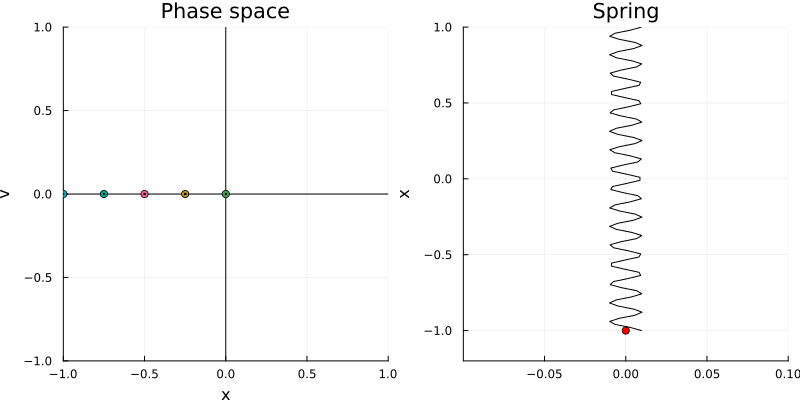

In [68]:
θs = Vector(range(0, 2π, length=100))
rs = Vector(range(0, 1, length=5))
ω = 1
xs, ys = [], []
anim = @animate for θ in θs
    p1 = plot(Vector(range(-1, 1, length=100)), Vector(range(-1, 1, length=100)).*0, xlim=(-1, 1), ylim=(-1, 1), legend=:none, color=:black)
    plot!(Vector(range(-1, 1, length=100)).*0, Vector(range(-1, 1, length=100)), color=:black, xlabel="x", ylabel="v", title="Phase space")
    for r in rs
        x = -ω*r*cos(θ)
        y = -ω*r*sin(θ)
        push!(xs, x); push!(ys, y)
        scatter!([x], [y], label="")
        scatter!(xs, ys, label="", color=:red, markersize=1, markershape=:rtriangle)
    end
    p2 = scatter([0], [-ω*cos(θ)], label="", color=:red, xlims=(-0.1, 0.1), ylim=(-1.2, 1), xlabel="", ylabel="x", title="Spring")
    plot!(cos.(50 .* Vector(range(-1, 1, length=100))).*0.01, Vector(range(-ω*cos(θ), 1, length=100)), color=:black, label="")
    plot(p1, p2, layout=(1, 2), size=(800, 400))
end
gif(anim, "linear_systems.gif", fps=50)

The actual shape of the orbit in the phase space is given by the solutions to the elliptic equation: $\omega^2 x_1^2 + x_2^2 = r$, which is equivalent to solving the energy conservation equation: $E = \frac{1}{2} m \omega^2 x_1^2 + \frac{1}{2} m x_2^2$.

---

### Classification of the fixed points

The fixed points of a linear system are the solutions to the equation $\mathbf{A} \vec{x} = \vec{0}$. To understand the different situations, let us consider the following decoupled system:

$$\mathbf{A} = \begin{bmatrix} a & 0 \\ 0 & -1 \end{bmatrix}$$

This clearly different eigenspaces as the parameter $a$ changes:

┌ Info: Saved animation to /home/jose/Documents/STUDY/Bsc/ComplexSystems/blog/JuliaChaos/entries/two_dim_flows/linear_systems2.gif
└ @ Plots /home/jose/.julia/packages/Plots/M4dfL/src/animation.jl:156


Plots.AnimatedGif("/home/jose/Documents/STUDY/Bsc/ComplexSystems/blog/JuliaChaos/entries/two_dim_flows/linear_systems2.gif")
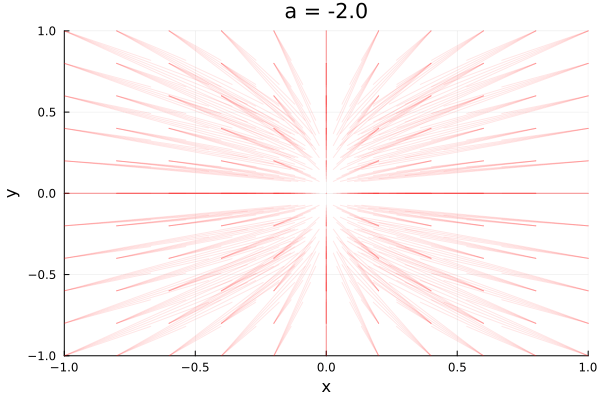

In [69]:
as = Vector(range(-2, 2, length=50))

amin = @animate for a in as
    plot(title="a = $a", xlim=(-1, 1), ylim=(-1, 1), legend=:none, xlabel="x", ylabel="y")
    for t in 0:0.2:1
        fx2(x) = x*ℯ^(a*t)
        fy2(y) = y*ℯ^(-1*t)
        for x in -1:0.2:1
            for y in -1:0.2:1
                plot!([x, fx2(x)], [y, fy2(y)], color=:red, alpha=0.1, label="")
            end
        end
    end
end
gif(amin, "linear_systems2.gif", fps=5)

Here we can see that when $a<-1$ the decay rate of x is faster than the decay rate of y, so trajectories converge to the slower direction, but all trajectories go to the **stable node** at $x^* = 0$.

As you can note, the case when $a=-1$ creates a fully symmetrical convergence pattern, which is known as **star node**, making well honor to its name.


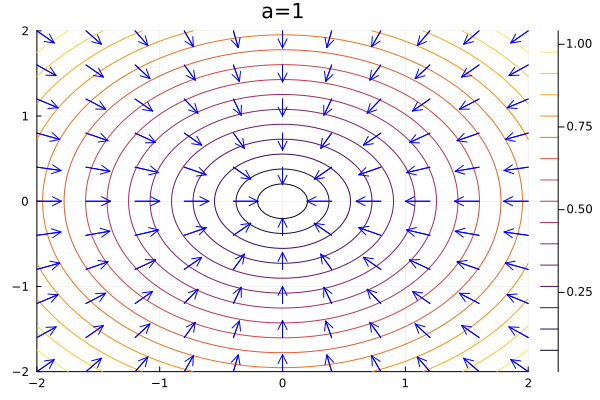

In [70]:
# Plot a vector field
fx2(x) = x*ℯ^(-1)
fy2(y) = y*ℯ^(-1)
gr(size=(600,400))
X = range(-2, stop=2, length=100)
Y = range(-2, stop=2, length=100)
f(x, y) = (fx2.(x).^2 + fy2.(y).^2 )^0.5
Plots.contour(X, Y, f, title="a=1",  xlims=(-2, 2), ylims=(-2, 2))
xs,ys = meshgrid(range(-2, stop=2, length=11), range(-2,stop=2,length=11))
AAf(x, y) = [-fx2(x); -fy2(y) ] / (5*f(x, y))
quiver!(xs, ys, quiver=AAf, c=:blue)

From $a-1$ to $a=0$ the faster decay rate in $y$ makes the the trajectories similar to the initial one, bue exchanging axis. However, there is a state phase change when $a=0$, which is known as **line of fixed nodes**, where all trajectories in $x$ are constants.

By the end of the process, when $a>0$, the trajectories are getting exponentially larger in $x$ but constant in $y$, so they diverge from the **saddle node** at $x^* = \infty$ except for the trajectories that go through $x=0$, which converge.

## Staibility of the fixed points

There are several different kinds of behaviors for stable $x*$. One of them talks about what happens to a particle at $t=\infty$; if the points converge to $x^*$, we say it is a  attractor.

The **Liapunov stability** is a different animal, as it cares of the behavior of the trajectories in the phase space in the surroundings of $x^*$. If the trajectories always live near $x^*$, we say that $x^*$ is a **Liapunov stable** fixed point.

In the last case, when we had $a=1$ the **fixed line** shows a Liapunov stable, but not attracting one (ass the trajectories are not converging to $x^*$), which is known as **neutrally stability**.

To shorcut terminology, if a point is both Liapunov and attractor, we call it  **asymptotically stable**, or neither of them, **unstable**.

## General analysis of the linear system

To generalize the analysis of the linear system, we will use the properties of the matrix $\mathbf{A}$, which is a $2\times 2$ matrix. To do this, we will compute the **trace** and the **determinant** of the matrix $\mathbf{A}$, which are defined as:

$$\text{Tr}(\mathbf{A}) = a + d$$
$$\text{Det}(\mathbf{A}) = ad - bc$$

Thus, the characteristic equation of the system is always solvable by computing the roots of the equation to find the eigenvalues of the matrix $\mathbf{A}$ as:

$$\lambda_{1,2} = \frac{1}{2} \left( \text{Tr}(\mathbf{A}) \pm \sqrt{\text{Tr}(\mathbf{A})^2 - 4 \text{Det}(\mathbf{A})} \right)$$

--- 
Example 2: Solve the the system 
$\dot x = x + y$, $\dot y = 4x - 2y$.

We have seen that the solution of the system is given by the exponential of the eigenspace of the matrix $\mathbf{A}$, which is given by:

$$\mathbf{A} = \begin{bmatrix} 1 & 1 \\ 4 & -2 \end{bmatrix}$$

Thus to compute the eigenvalues, we have to compute the trace and the determinant of the matrix $\mathbf{A}$:

In [72]:
A = [1 1; 4 -2]
@show det(A), tr(A);

(det(A), tr(A)) = (-6.0, -1)


In [73]:
function lambdas(det, tr)
    l1 = (tr + (tr^2 - 4det)^0.5)/2
    l2 = (tr - (tr^2 - 4det)^0.5)/2
    return l1, l2
end

lambdas(det(A), tr(A))

(2.0, -3.0)

And this is in agreement with the solution of the system:

In [74]:
@show eigvals(A);

eigvals(A) = [-3.0, 2.0]


Therefore, the solution of the system is:

$\vec{x}(t) = \alpha e^{2t} \begin{bmatrix} 1 \\ 1 \end{bmatrix} + \beta e^{-3t} \begin{bmatrix} 1 \\ -4 \end{bmatrix}$

Now let us draw the phase portrait of the system:

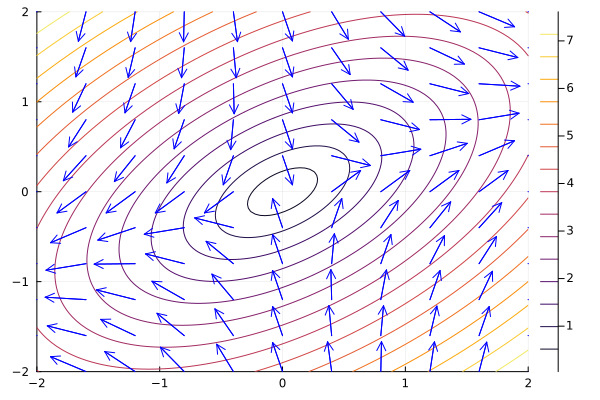

In [75]:
fx4(x, y) = x*ℯ^(2t) + y*ℯ^(-3t)
fy4(x, y) = x*ℯ^(2t) - 4y*ℯ^(-3t)
X = range(-2, stop=2, length=100)
Y = range(-2, stop=2, length=100)
f(x, y) = (fx4.(x, y).^2 + fy4.(x, y).^2 )^0.5
contour(X, Y, f, xlims=(-2, 2), ylims=(-2, 2))
xs,ys = meshgrid(range(-2, stop=2, length=11), range(-2,stop=2,length=11))
AAf(x, y) = [fx4(x, y); fy4(x, y) ] ./ (3*f(x, y))
quiver!(xs, ys, quiver=AAf, c=:blue)

--- 

We just saw that the solution of the system is given by the exponential of the eigenspace of the matrix $\mathbf{A}$, and in this case both of them were real. But if that is not the case, we have a **spiral** in the phase space:

$$\lambda_{1,2} = \alpha \pm \omega i$$

where $\alpha$ is the real part of the eigenvalue and $\omega$ is the imaginary part. if $alpha$ is positive, the spiral is grwoing, and if it is negative, the spiral is shrinking.

This final remark allows to classify the fixed points of the system in general only by looking at the eigenspace of the matrix $\mathbf{A}$. The classification is given by the following table:

| $tr$ | det | Stability |
|:--------:|:--------:|:-----------:|
$tr > 0$ | $det > tr^2/4$ | Unstable |
$tr$  | $det = tr^2/4$ | Degenerate node stars |
$tr = 0$  | $det < tr^2/4$ | Center |
$tr < 0$  | $det > tr^2/4$ | Stable spiral |
$tr < 0$  | $det = tr^2/4$ | Stable nodes | -> Liaunov stable + attractor
$tr$  | $det = 0$ | non-isolated fixed points |
$tr$  | $det < 0$ | Saddle spiral |

Which is better represented in [this](https://www.chebfun.org/examples/ode-linear/img/DynamicalSystems_04.png) figure.


## Conclusion

We have seen that the linear system is a very simple model, but it is very useful to understand the behavior of the systems in higher dimensions.

A quick summary of the main points:

* The solution of the system is given by the exponential of the eigenspace of the matrix $\mathbf{A}$.
* The fixed points of the system are the solutions to the equation $\mathbf{A} \vec{x} = \vec{0}$.
* **Attractors** are the fixed points that the trajectories converge to from $t \to \infty$.
* **Liapunov stability** is the property of the fixed points that the trajectories are always near the fixed point.
* **Saddle** is the fixed point for which the trajectories are diverging except for the trajectories that go through a specific manifold.
* **Spiral** is the fixed point for which the corresponding eigenspace is complex.